In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
x_points = np.array([1,1,2,3,4,5,6,7,8,9,10,11]).reshape(12,1)
y_points = np.array([1,2,3,1,4,5,6,4,7,10,15,9]).reshape(12,1)

In [114]:
x = np.linspace(0, 10, 100)
y = 3 + 1 * x  + np.random.normal(0, 1, size=100)

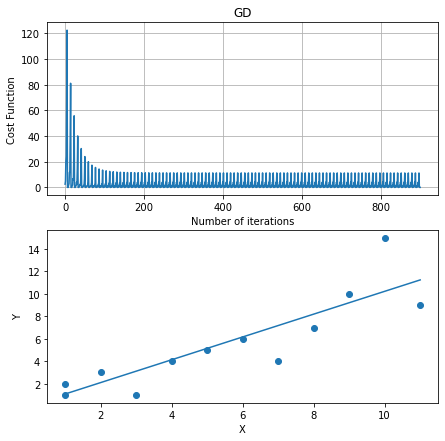

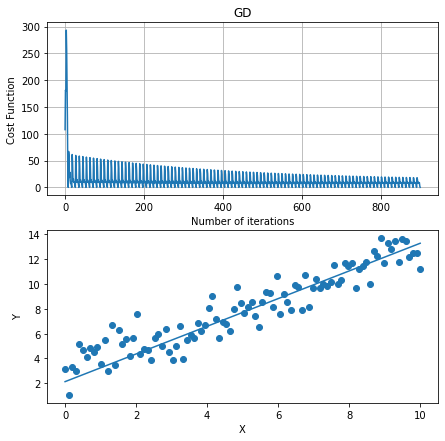

In [116]:
def LR_Mini_Batch_single_variable(x_points,y_points,alpha,iterations):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,x_points],axis=1)
    cost = []
    factor = 8
    batch_size = np.ceil(len(x_points)/factor)
    batch_size = int(batch_size)
    for i in range(iterations):
        for j in range(factor+1):
            x = x_c[j*batch_size:j*batch_size+batch_size,:]
            y = y_points[j*batch_size:j*batch_size+batch_size,0]
            thetas = np.array([theta0,theta1]).reshape(1,2)
            Hypothesis = x@thetas.T
            J = np.sum((Hypothesis-y)**2) * (1/(2*batch_size))
            theta0 = theta0 - (alpha * np.sum(Hypothesis-y) * (1/(2*batch_size)))
            theta1 = theta1 - (alpha * np.sum((Hypothesis-y)*x_points[j*batch_size:j*batch_size+batch_size,0]) * (1/(2*batch_size)))
            cost.append(J)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    Hypothesis = x_c@thetas.T
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1
alpha = 0.001

theta0,theta1 = LR_Mini_Batch_single_variable(x_points,y_points,alpha,100)
theta0,theta1 = LR_Mini_Batch_single_variable(x,y,alpha,100)

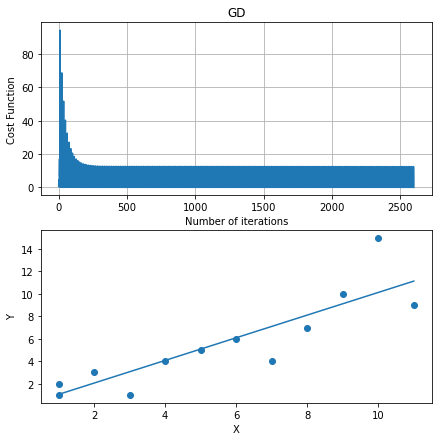

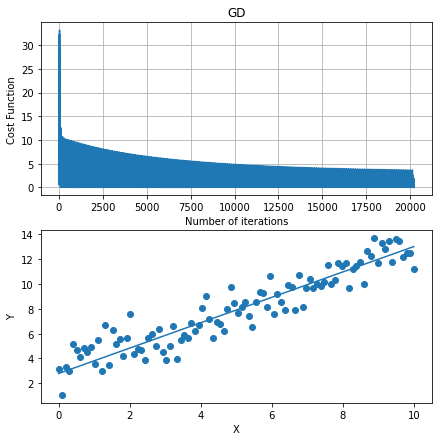

In [123]:
def LR_Stocastic_single_variable(x_points,y_points,alpha,iterations):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,x_points],axis=1)
    cost = []
    factor = m
    batch_size = np.ceil(len(x_points)/factor)
    batch_size = int(batch_size)
    for i in range(iterations):
        for j in range(factor+1):
            x = x_c[j*batch_size:j*batch_size+batch_size,:]
            y = y_points[j*batch_size:j*batch_size+batch_size,0]
            thetas = np.array([theta0,theta1]).reshape(1,2)
            Hypothesis = x@thetas.T
            J = np.sum((Hypothesis-y)**2) * (1/(2*batch_size))
            theta0 = theta0 - (alpha * np.sum(Hypothesis-y) * (1/(2*batch_size)))
            theta1 = theta1 - (alpha * np.sum((Hypothesis-y)*x_points[j*batch_size:j*batch_size+batch_size,0]) * (1/(2*batch_size)))
            cost.append(J)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    Hypothesis = x_c@thetas.T
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1
theta0,theta1 = LR_Stocastic_single_variable(x_points,y_points,alpha,200)
theta0,theta1 = LR_Stocastic_single_variable(x,y,alpha,200)

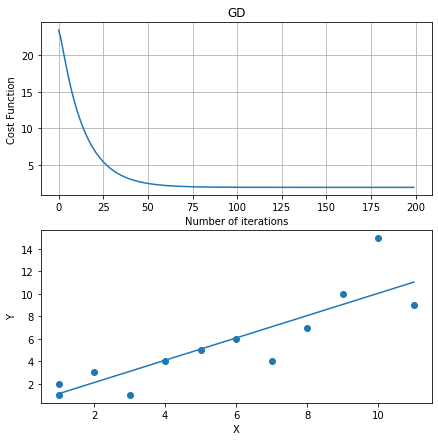

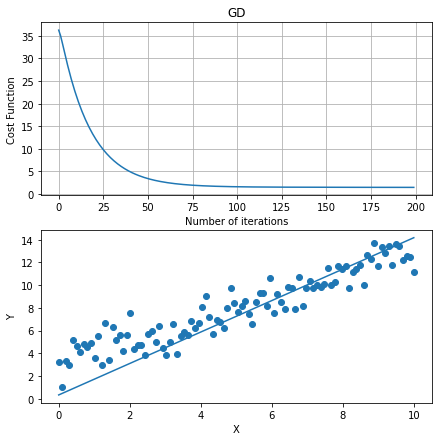

In [118]:
gamma = 0.7
alpha = 0.15
def LR_Momentum_single_variable(x_points,y_points,alpha,iterations,gamma):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x = np.ones(m).reshape(m,1)
    x = np.concatenate([x,x_points],axis=1)
    cost = []
    vt0 = 0
    vt1 = 0
    for i in range(iterations):
        thetas = np.array([theta0,theta1]).reshape(1,2)
        Hypothesis = x@thetas.T
        J = np.sum((Hypothesis-y_points)**2) * (1/(2*m))
        vt0 = gamma*vt0 + (alpha * np.sum(Hypothesis-y_points) * (1/(2*m)))
        vt1 = gamma*vt1 + (alpha * np.sum((Hypothesis-y_points)*x_points) * (1/(2*m)))
        theta0 = theta0 - vt0
        theta1 = theta1 - vt1
        cost.append(J)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1
alpha = 0.001
gamma = 0.4 

theta0,theta1 = LR_Momentum_single_variable(x_points,y_points,alpha,200,gamma)
theta0,theta1 = LR_Momentum_single_variable(x,y,alpha,200,gamma)

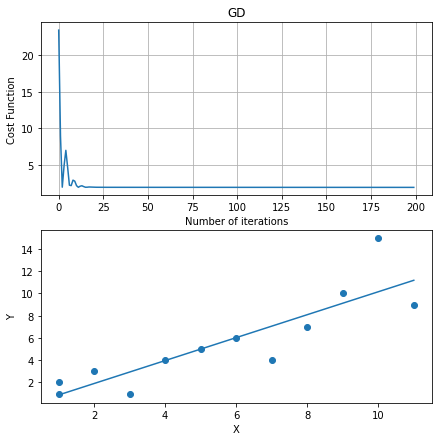

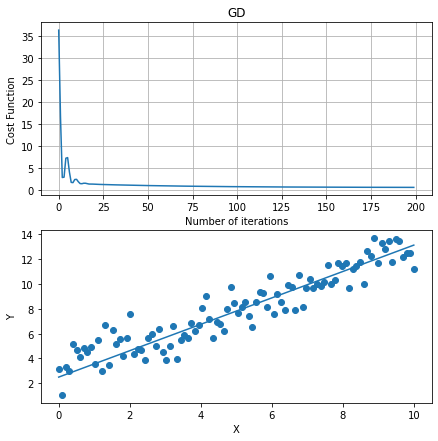

In [119]:
def LR_NAG_single_variable(x_points,y_points,alpha,iterations,gamma):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x = np.ones(m).reshape(m,1)
    x = np.concatenate([x,x_points],axis=1)
    cost = []
    vt0 = 0
    vt1 = 0
    wtemp0 = 0
    wtemp1 = 0
    for i in range(iterations):
        thetas = np.array([theta0,theta1]).reshape(1,2)
        Hypothesis = x@thetas.T
        J = np.sum((Hypothesis-y_points)**2) * (1/(2*m))
        wtemp0 = theta0 - gamma*vt0
        wtemp1 = theta1 - gamma*vt1
        theta0 = wtemp0 - (alpha * np.sum(Hypothesis-y_points) * (1/(2*m)))
        theta1 = wtemp1 - (alpha * np.sum((Hypothesis-y_points)*x_points) * (1/(2*m)))
        vt0 = gamma*vt0 + (alpha * np.sum(Hypothesis-y_points) * (1/(2*m)))
        vt1 = gamma*vt1 + (alpha * np.sum((Hypothesis-y_points)*x_points) * (1/(2*m)))
        theta0 = theta0 - vt0
        theta1 = theta1 - vt1
        cost.append(J)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1
gamma = 0.7
alpha = 0.01

theta0,theta1 = LR_NAG_single_variable(x_points,y_points,alpha,200,gamma)
theta0,theta1 = LR_NAG_single_variable(x,y,alpha,200,gamma)

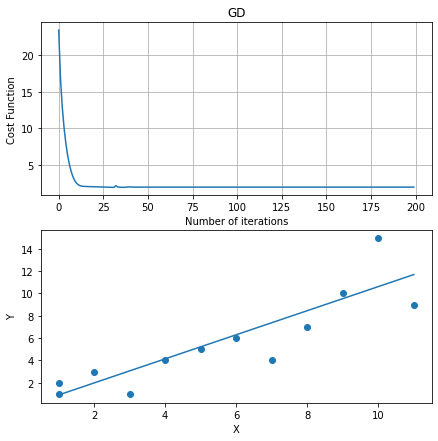

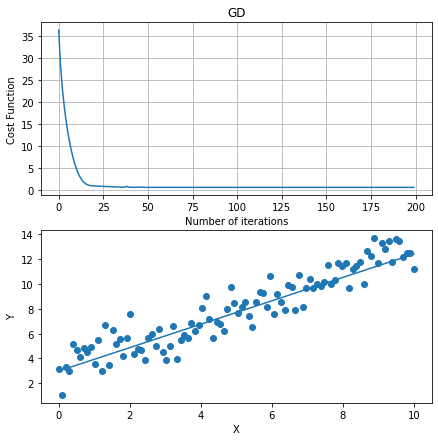

In [120]:
def LR_ADA_grad_single_variable(x_points,y_points,alpha,iterations,gamma,epsilon):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x = np.ones(m).reshape(m,1)
    x = np.concatenate([x,x_points],axis=1)
    cost = []
    vt0 = 0
    vt1 = 0
    for i in range(iterations):
        thetas = np.array([theta0,theta1]).reshape(1,2)
        Hypothesis = x@thetas.T
        J = np.sum((Hypothesis-y_points)**2) * (1/(2*m))
        vt0 = gamma*vt0 + (np.sum(Hypothesis-y_points) * (1/(2*m)))**2
        vt1 = gamma*vt1 + (np.sum((Hypothesis-y_points)*x_points) * (1/(2*m)))**2
        theta0 = theta0 - alpha*(np.sum(Hypothesis-y_points) * (1/(2*m))) * (1/((vt0**0.5)+epsilon))
        theta1 = theta1 - alpha*(np.sum((Hypothesis-y_points)*x_points) * (1/(2*m))) * (1/((vt1**0.5)+epsilon))
        cost.append(J)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1
gamma = 0.7
alpha = 0.15
epsilon = 1e-8

theta0,theta1 = LR_ADA_grad_single_variable(x_points,y_points,alpha,200,gamma,epsilon)
theta0,theta1 = LR_ADA_grad_single_variable(x,y,alpha,200,gamma,epsilon)

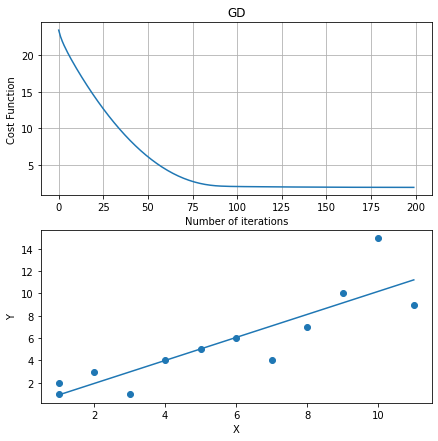

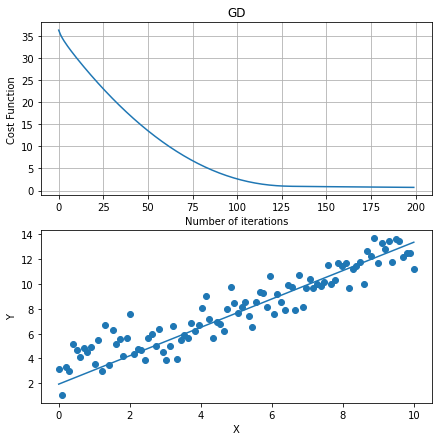

In [121]:
def LR_RMS_Prop_single_variable(x_points,y_points,alpha,iterations,gamma,epsilon):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x = np.ones(m).reshape(m,1)
    x = np.concatenate([x,x_points],axis=1)
    cost = []
    vt0 = 0
    vt1 = 0
    for i in range(iterations):
        thetas = np.array([theta0,theta1]).reshape(1,2)
        Hypothesis = x@thetas.T
        J = np.sum((Hypothesis-y_points)**2) * (1/(2*m))
        vt0 = gamma*vt0 + (1-gamma) * (np.sum(Hypothesis-y_points) * (1/(2*m)))**2
        vt1 = gamma*vt1 + (1-gamma) * (np.sum((Hypothesis-y_points)*x_points) * (1/(2*m)))**2
        theta0 = theta0 - alpha*(np.sum(Hypothesis-y_points) * (1/(2*m))) * (1/((vt0**0.5)+epsilon))
        theta1 = theta1 - alpha*(np.sum((Hypothesis-y_points)*x_points) * (1/(2*m))) * (1/((vt1**0.5)+epsilon))
        cost.append(J)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1
gamma = 0.7
alpha = 0.01
epsilon = 1e-8

theta0,theta1 = LR_RMS_Prop_single_variable(x_points,y_points,alpha,200,gamma,epsilon)
theta0,theta1 = LR_RMS_Prop_single_variable(x,y,alpha,200,gamma,epsilon)

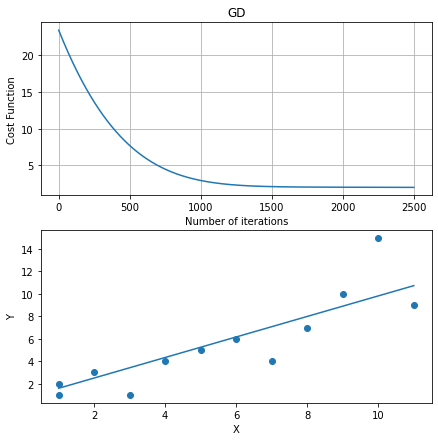

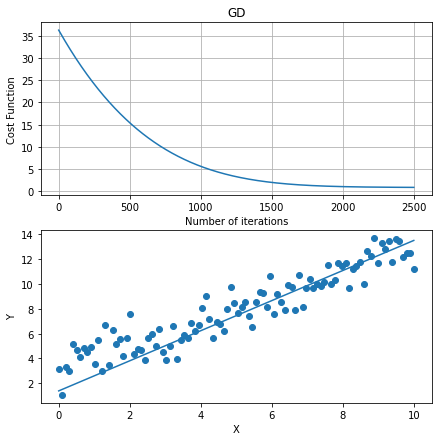

In [122]:
def LR_Adam_single_variable(x_points,y_points,alpha,iterations,epsilon,beta1,beta2):
    m = len(y_points)
    theta0 = 0
    theta1 = 0
    x = np.ones(m).reshape(m,1)
    x = np.concatenate([x,x_points],axis=1)
    cost = []
    vt0 = 0
    vt1 = 0
    mt0 = 0 
    mt1 = 0
    mt_0 = 0
    mt_1 = 0
    vt_0 = 0
    vt_1 = 0
    for i in range(iterations):
        thetas = np.array([theta0,theta1]).reshape(1,2)
        Hypothesis = x@thetas.T
        J = np.sum((Hypothesis-y_points)**2) * (1/(2*m))
        mt0 = beta1*mt0 + (1-beta1) * (np.sum(Hypothesis-y_points) * (1/(2*m)))
        mt1 = beta1*mt1 + (1-beta1) * (np.sum((Hypothesis-y_points)*x_points) * (1/(2*m)))
        vt0 = beta2*vt0 + (1-beta2) * (np.sum(Hypothesis-y_points) * (1/(2*m)))**2
        vt1 = beta2*vt1 + (1-beta2) * (np.sum((Hypothesis-y_points)*x_points) * (1/(2*m)))**2
        beta1t = beta1**(i+1)
        beta2t = beta2**(i+1)
        mt_0 = mt0/(1-beta1t)
        mt_1 = mt1/(1-beta1t)
        vt_0 = vt0/(1-beta2t)
        vt_1 = vt1/(1-beta2t)
        theta0 = theta0 - alpha*mt_0*(1/((vt_0**0.5)+epsilon))
        theta1 = theta1 - alpha*mt_1*(1/((vt_1**0.5)+epsilon))
        cost.append(J)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(x_points,y_points)
    plt.plot(x_points,Hypothesis)
    #plt.axis('off')
    
    return theta0,theta1
beta1 = 0.9
beta2 = 0.999
alpha = 0.001
epsilon = 1e-8

theta0,theta1 = LR_Adam_single_variable(x_points,y_points,alpha,2500,epsilon,beta1,beta2)
theta0,theta1 = LR_Adam_single_variable(x,y,alpha,2500,epsilon,beta1,beta2)

# Quiz

1. difference between Batch, Mini-batch, and Stocastic gradient descent
    Batch: taking all data points to train as a whole as a single iteration 
    Mini-batch: taking similar portions of data points to train, 1 epoch = multiple iterations =           no of batches
    Stocastic: train point by point, 1 epoch = multiple iterations = the whole batch
    
2. Gradient descent will not always lead to global min(sometimes local min) [False]

3. To prevent GD from overshooting the minimum: Decrease learning rate

4. In flat regions of the loss function gradient is: small

5. In steep regions of the loss function gradient is: large

6. Momentum-based GD (select all correct statements): Find the minimum faster than vanilla GD.
      Has a lot of U-turns near the minimum.

7. NAG overcomes the momentum-based GD drawbacks by the looking ahead step. [True]

8. Gradient value depends on the input. [True]

9. Adagrad and RMSProp algorithms concern with:
      Adaptive learning rate.

10. Adam algorithm concern with:
      a & b.

11. Adagrad kills the gradient for:
      Sparse features.

12. Adam takes some U-turns (fluctuate around the minimum) due to:
      The momentum term.